In [1]:
import pandas as pd
import os

## Carga de datos

Cargar múltiples CSV en un mismo DataFrame de pandas, concatenados uno encima de otro.

In [2]:
# LIstar los archivos del csv del directorio de spotify usando: os

file_names = os.listdir("../Data/spotify")
file_names

['1970.csv',
 '2010.csv',
 '1960.csv',
 '1980.csv',
 '2000.csv',
 '1990.csv',
 '1950.csv']

In [3]:
# Bucle for para cargar uno a uno en pandas, concat para unirlos a un DataFrame global

df = pd.DataFrame() # DataFrame vacío donde ir concatenando cada DataFrame

for file_names in file_names:
    df_file = pd.read_csv("../Data/spotify/" + file_names)
    print(file_names, df_file.shape)
    df = pd.concat([df, df_file], ignore_index=True)
    
print(f"df_final: {df.shape}")

1970.csv (104, 15)
2010.csv (100, 15)
1960.csv (97, 15)
1980.csv (105, 15)
2000.csv (100, 15)
1990.csv (88, 15)
1950.csv (73, 15)
df_final: (667, 15)


In [4]:
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1975,71,40,41,-10,30,22,354,27,5,84
1,2,Highway to Hell,AC/DC,album rock,1979,116,91,57,-5,16,42,208,6,13,83
2,3,Don't Stop Me Now - 2011 Mix,Queen,glam rock,1978,156,87,56,-5,78,61,209,5,17,82
3,4,Rocket Man (I Think It's Going To Be A Long Lo...,Elton John,glam rock,1972,137,53,60,-9,9,34,282,43,3,81
4,5,We Will Rock You - Remastered,Queen,glam rock,1977,81,50,69,-7,26,48,122,68,12,79


In [5]:
# Revisar concatenado, para  ver si hay errores
df.iloc[70:80]

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
70,71,September Earth,Wind & Fire,disco,2014,126,83,69,-7,25,98,215,17,3,60
71,72,Doctor Doctor - 2007 Remaster,UFO,album rock,1974,143,80,30,-7,50,56,252,0,5,60
72,73,Ain't No Mountain High Enough,Diana Ross,adult standards,2017,99,79,39,-5,38,38,215,19,4,60
73,74,Baby Come Back,Player,soft rock,2007,157,57,65,-11,12,56,214,5,11,59
74,75,Boulder to Birmingham - Remastered,Emmylou Harris,country rock,1975,126,32,48,-11,10,31,213,78,3,59
75,76,S.O.S.,ABBA,europop,1975,125,71,42,-6,29,58,202,25,3,59
76,77,Now That We Found Love,The O'Jays,classic soul,1973,114,65,72,-8,27,96,281,25,4,59
77,78,Fire on the Mountain,The Marshall Tucker Band,album rock,1975,102,83,51,-6,16,57,236,11,4,58
78,79,Lost in Music,Sister Sledge,dance pop,1979,114,84,76,-8,10,85,287,5,3,58
79,80,You Make Me Feel Like Dancing,Leo Sayer,adult standards,1976,96,73,73,-5,11,71,221,8,5,57


In [6]:
# Para renombrar columnas. En este caso la columna pop a popularity
df = df.rename(columns = {
    "pop": "popularity",
    "nrgy": "energy"
})
df.head(2)

,Number,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1975,71,40,41,-10,30,22,354,27,5,84
1,2,Highway to Hell,AC/DC,album rock,1979,116,91,57,-5,16,42,208,6,13,83


In [7]:
# Para ver los valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      667 non-null    int64 
 1   title       667 non-null    object
 2   artist      667 non-null    object
 3   top genre   651 non-null    object
 4   year        667 non-null    int64 
 5   bpm         667 non-null    int64 
 6   energy      667 non-null    int64 
 7   dnce        667 non-null    int64 
 8   dB          667 non-null    int64 
 9   live        667 non-null    int64 
 10  val         667 non-null    int64 
 11  dur         667 non-null    int64 
 12  acous       667 non-null    int64 
 13  spch        667 non-null    int64 
 14  popularity  667 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 78.3+ KB


In [8]:
# Para ver los valores nulos
df.isnull().sum()

Number         0
title          0
artist         0
top genre     16
year           0
bpm            0
energy         0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
popularity     0
dtype: int64

In [9]:
# Opción 1: Rellenar los nulos de la columna "top genre" con la palabra "undefined".
# df["top genre"] = df["top genre"].fillna("undefined")
df["top genre"].fillna("undefined", inplace=True)


/tmp/ipykernel_75234/3451447925.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["top genre"].fillna("undefined", inplace=True)


In [10]:
# Opción 2: rellenar los nulos de la columna "top genre" con la moda de esa columna.

#top_genre_mode = df["top genre"].mode().iloc[0]
#df["top genre"].fillna(top_genre_mode, inplace=True)

In [11]:
# Opción 3: rellenar con la moda de los artistas concretos para los que top_genre es null
# Hemos comprobado que esos artistas tienen todas las canciones con top genre a nan por tanto no sirve
import numpy as np

def mode(x):
    if not x.mode().empty:
        return x.mode().iloc[0]
    else:
        return np.nan

artist_top_genre_mode = df.groupby("artist")["top genre"].agg(mode)
artist_top_genre_mode


artist
 Wind & Fire                        disco
*NSYNC                           boy band
5 Seconds of Summer              boy band
50 Cent                east coast hip hop
ABBA                              europop
                              ...        
ZAYN                            dance pop
ZZ Top                         album rock
Zara Larsson                    dance pop
Zedd                           complextro
gnash                                 pop
Name: top genre, Length: 469, dtype: object

In [12]:
def fill_top_genre_with_mode_by_artist(row):
    if pd.isna(row["top genre"]):
        # Si es nulo devolvermos la moda top genre en base al artista
        # Si no existe artista entonces devuelve la moda global
        # Si sí existe artista entonces asigna la moda de top genre para ese artista concreto
        mode = artist_top_genre_mode.get(row["artist"], artist_top_genre_mode)
        print(f"artist: {row["artis"]}, artist mode: {mode}, global mode: {artist_top_genre_mode}")
        return artist_top_genre_mode.get(row["artist"], top_genre_mode)
        
        
    #Si no es nulo devolvemos tal cual está
    return row["top genre"]

df.apply(fill_top_genre_with_mode_by_artist, axis=1)

0                 glam rock
1                album rock
2                 glam rock
3                 glam rock
4                 glam rock
               ...         
662         adult standards
663               undefined
664               undefined
665               undefined
666    deep adult standards
Length: 667, dtype: object

In [13]:
# Verificar que los nulos han sido rellenados
df.isnull(). sum()

Number        0
title         0
artist        0
top genre     0
year          0
bpm           0
energy        0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
dtype: int64

In [14]:
# Ver si hay duplicados y borrarlos

print(df.duplicated().sum())
df.drop_duplicates(inplace=True) #Para borrar duplicados

0


In [15]:
# Borrar columna Number
df.drop("Number", axis=1, inplace=True)

In [16]:
df.head(3)

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1975,71,40,41,-10,30,22,354,27,5,84
1,Highway to Hell,AC/DC,album rock,1979,116,91,57,-5,16,42,208,6,13,83
2,Don't Stop Me Now - 2011 Mix,Queen,glam rock,1978,156,87,56,-5,78,61,209,5,17,82


In [17]:
# Ordenar por año ascendente

# Otra forma de hacerlo : df.sort_values("year")
df.sort_values("year", inplace=True)
df.reset_index(drop=True, inplace=True) #Resetear índice
df.head()


,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44
4,Gigi,Billy Eckstine,adult standards,1958,81,12,21,-17,12,19,155,93,3,35


In [18]:
df.tail()

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
662,Peppermint Twist Pt.1,Joey Dee,australian talent show,2019,199,73,42,-11,73,72,122,37,14,30
663,I Will Survive - Extended Version,Gloria Gaynor,disco,2019,116,85,76,-5,27,59,197,6,5,61
664,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
665,Marianne,The Hilltoppers,deep adult standards,2019,106,55,71,-8,19,82,137,73,4,33
666,Someone Elses Roses,Joan Regan,undefined,2019,100,14,29,-10,15,32,143,89,3,34


<Axes: >

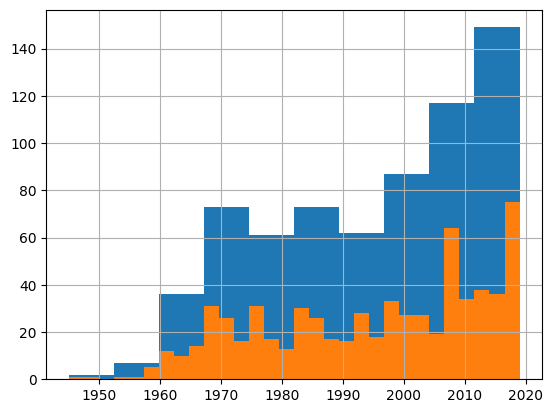

In [19]:
# Visualizaciones

df["year"].hist() # Histograma de la columna year
df["year"].hist(bins=30)

<Axes: >

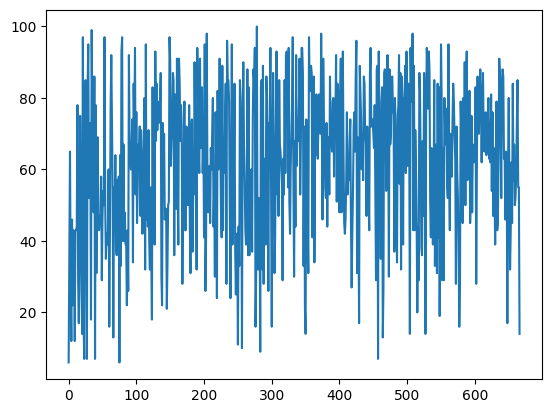

In [20]:
df["energy"].plot() #Gráfico de líneas con los valores que hay. Sirve sobretodo para ver valores anómalos 

<Axes: >

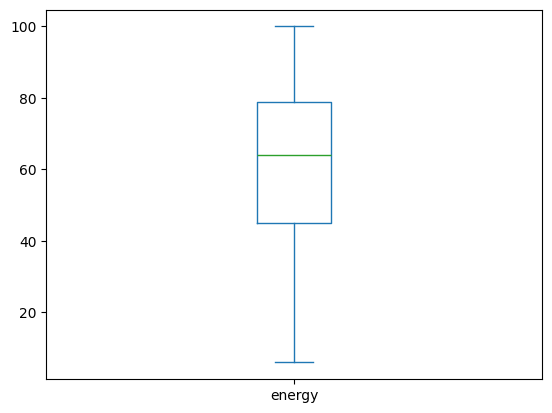

In [21]:
# El parámetro kind permite cambiar el tipo de gráfico
df["energy"].plot(kind="box")

In [22]:
# Mostrar artistas más repetidos en DataFrame, usando value_counts
pd.DataFrame(df["artist"].value_counts(15)) # En value_counts podemos poner el valor que queramos

,proportion
artist,
Elton John,0.017991
Queen,0.016492
ABBA,0.013493
The Beatles,0.010495
Barbra Streisand,0.008996
...,...
Teresa Brewer,0.001499
Oasis,0.001499
Luniz,0.001499


In [23]:
# Mostrar géneros más repetidos en DataFrame, usando value_counts
pd.DataFrame(df["top genre"].value_counts(15))

,proportion
top genre,
dance pop,0.170915
adult standards,0.139430
album rock,0.115442
glam rock,0.034483
brill building pop,0.029985
...,...
appalachian folk,0.001499
alternative r&b,0.001499
emo rap,0.001499


In [24]:
# Mostrar la canción más popular y la menos popular: con idxmax (para la que más) y con idxmin (para la que menos)
# df["popularity"].max()

# Posición de la canción más popular
df["popularity"].idxmax()

653

In [25]:
df.iloc[df["popularity"].idxmax()]

title               bad guy
artist        Billie Eilish
top genre        electropop
year                   2019
bpm                     135
energy                   43
dnce                     70
dB                      -11
live                     10
val                      56
dur                     194
acous                    33
spch                     38
popularity               94
Name: 653, dtype: object

In [26]:
df.iloc[df["popularity"].idxmin()]

title         Held for Questioning
artist                Rusty Draper
top genre     deep adult standards
year                          1953
bpm                            109
energy                          65
dnce                            70
dB                              -2
live                            14
val                             85
dur                            146
acous                           79
spch                             3
popularity                      26
Name: 2, dtype: object

In [27]:
# Obtener la canción más popular por año, esto requiere agrupar por año (groupby)

filtro = df.groupby("year")["popularity"].idxmax() # Índice de cada año de la canción más popular
df.iloc[filtro]
df.iloc[filtro].tail(20) #las 20 canciones más populares por año

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
362,In the End,Linkin Park,alternative metal,2000,105,86,56,-6,21,40,217,1,6,83
372,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76
382,The Scientist,Coldplay,permanent wave,2002,146,44,56,-7,11,21,310,73,2,83
386,Numb,Linkin Park,alternative metal,2003,110,86,50,-4,64,24,186,0,4,81
393,Yeah! (feat. Lil Jon & Ludacris),Usher,atl hip hop,2004,105,79,89,-5,4,58,250,2,11,79
408,Fix You,Coldplay,permanent wave,2005,138,42,21,-9,11,12,296,16,3,81
414,So Sick,Ne-Yo,dance pop,2006,93,57,45,-8,19,58,207,25,31,77
421,Stronger,Kanye West,chicago rap,2007,104,72,62,-8,41,49,312,1,15,80
463,Umbrella,Rihanna,barbadian pop,2008,174,83,58,-5,4,57,276,1,13,80
470,Fireflies,Owl City,pop,2009,180,66,51,-7,12,46,228,3,4,78


In [28]:
# Crear columna década a partir de columna año
df["year"] / 10

0      194.5
1      194.8
2      195.3
3      195.7
4      195.8
       ...  
662    201.9
663    201.9
664    201.9
665    201.9
666    201.9
Name: year, Length: 667, dtype: float64

In [29]:
df["decade"] = df["year"] // 10 * 10 # Para eliminar la parte decimal se le añade una segunda división, y para agregar un 0 se multiplica por 10
df.head() # Para mostrar lo que hace la función

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity,decade
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52,1940
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,1940
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26,1950
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44,1950
4,Gigi,Billy Eckstine,adult standards,1958,81,12,21,-17,12,19,155,93,3,35,1950


In [30]:
# Para mover columnas a una posición concreta: en este caso mover la columna decade antes o después de la columna year
    # Obtener la posición de la columna year
print(df.columns)
position = df.columns.get_loc("year")
position

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'energy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'popularity', 'decade'],
      dtype='object')


3

In [31]:
    # Sacar la columna decade, se puede hacer con pop
serie_decade = df.pop("decade")
    # Insertar columna en posición obtenida
df.insert(position, "decade", serie_decade)

In [32]:
df.head(3)

,title,artist,top genre,decade,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1940,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1940,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1950,1953,109,65,70,-2,14,85,146,79,3,26


In [34]:
df.groupby("decade")["popularity"].idxmax()
df.iloc[filtro]

,title,artist,top genre,decade,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1940,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1940,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1950,1953,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1950,1957,73,28,55,-10,9,47,174,85,3,44
5,Chicago - Remastered,Frank Sinatra,adult standards,1950,1958,148,46,51,-10,40,79,134,61,7,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,The Hills,The Weeknd,canadian contemporary r&b,2010,2015,113,56,58,-7,14,14,242,7,5,83
574,Starboy,The Weeknd,canadian contemporary r&b,2010,2016,186,59,68,-7,14,49,230,14,28,84
592,Thunder,Imagine Dragons,modern rock,2010,2017,168,82,61,-5,15,29,187,1,4,85
639,rockstar (feat. 21 Savage),Post Malone,dfw rap,2010,2018,160,52,59,-6,13,13,218,12,7,88


In [36]:
# Mostrar duración media de canciones por año
    #Calcular primero duración media por año y mostrarla con un plot
print(df.groupby("year")["dur"].mean())

year
1945    169.000000
1948    123.000000
1953    146.000000
1957    174.000000
1958    144.500000
           ...    
2015    215.000000
2016    202.541667
2017    208.666667
2018    214.000000
2019    194.733333
Name: dur, Length: 66, dtype: float64


<Axes: xlabel='year'>

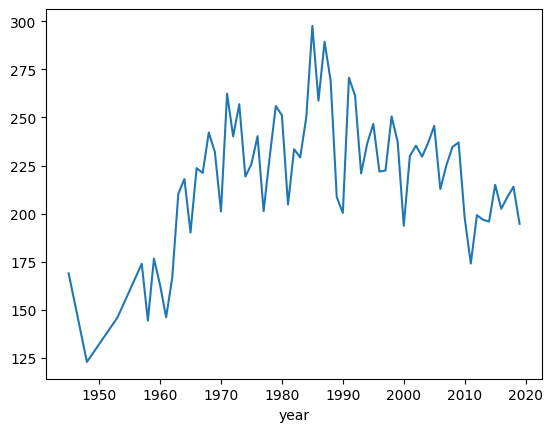

In [39]:
df.groupby("year")["dur"].mean().plot() # Plot: para ver la gráfica